In [336]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [337]:
df = pd.read_csv("./dataset.csv")

df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Female,43,Doctor,6.3,8,53,6,Overweight,140/90,70,9104,NaN
496,497,Male,41,Software Engineer,7.4,6,48,4,Normal,125/80,73,6821,NaN
497,498,Female,49,Doctor,5.4,8,66,4,Normal,115/75,79,5319,Sleep Apnea
498,499,Male,30,Sales Representative,6.9,8,77,4,Overweight,120/80,74,7786,Insomnia


In [338]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])

df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

df = df.drop(columns=['Occupation', 'Physical Activity Level', 'Blood Pressure', 'Daily Steps', 'Sleep Disorder'])

df

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Heart Rate,Systolic_BP,Diastolic_BP
0,1,1,27,6.1,6,6,3,77,126,83
1,2,1,28,6.2,6,8,0,75,125,80
2,3,1,28,6.2,6,8,0,75,125,80
3,4,1,28,5.9,4,8,2,85,140,90
4,5,1,28,5.9,4,8,2,85,140,90
...,...,...,...,...,...,...,...,...,...,...
495,496,0,43,6.3,8,6,3,70,140,90
496,497,1,41,7.4,6,4,0,73,125,80
497,498,0,49,5.4,8,4,0,79,115,75
498,499,1,30,6.9,8,4,3,74,120,80


Random Forest Classifire Model

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or use RandomForestRegressor for numerical targets
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [340]:
X = df[['Age', 'Gender', 'Sleep Duration', 'Stress Level', 'BMI Category', 'Heart Rate', 'Systolic_BP', 'Diastolic_BP']]
y = df['Quality of Sleep']

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=238)

model = RandomForestClassifier(max_features='sqrt', random_state=238)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=238)

In [342]:
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.86


Model Saving

In [344]:
import pickle

with open('model_1.pkl', 'wb') as file:
    pickle.dump(model, file)

Graph Plotting

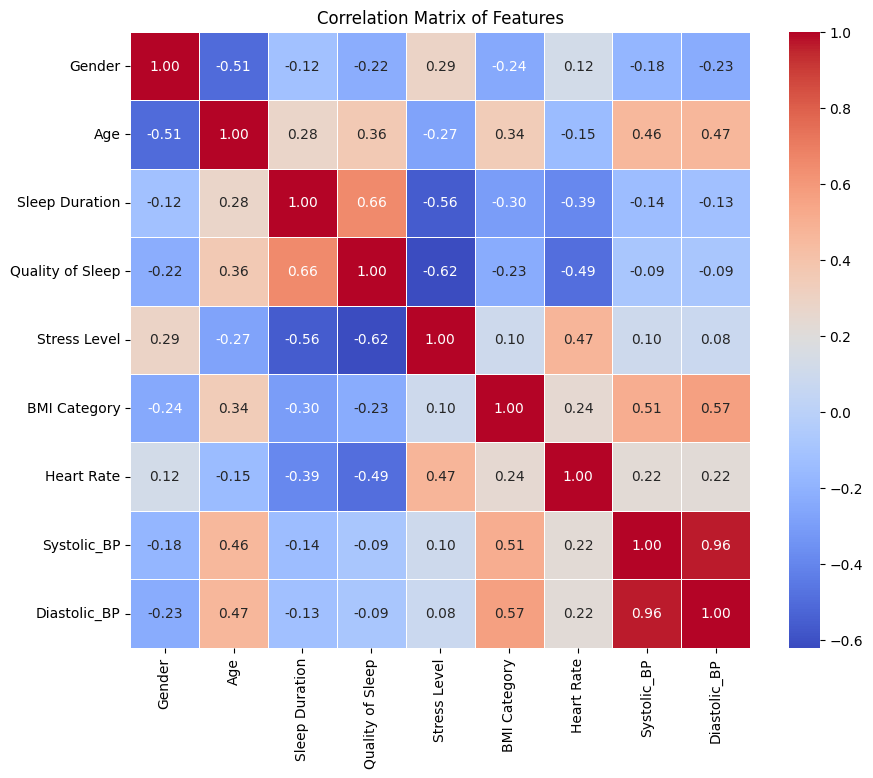

In [322]:
X_full = df.drop(['Person ID'], axis=1)

corr_matrix = X_full.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()